## Ridge and LAsso Regression implementation

In [1]:
from sklearn.datasets import load_boston

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=load_boston()

C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [4]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dataset = pd.DataFrame(df.data)
print(dataset.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [6]:
dataset.columns=df.feature_names

In [7]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.target.shape

(506,)

In [9]:
dataset["Price"]=df.target

In [10]:
df_train=dataset.head(400)

In [11]:
X=df_train.iloc[:,:-1] ## independent features
y=df_train.iloc[:,-1] ## dependent features

## Linear Regression


In [12]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,cv=9)
mean_mse=np.mean(mse)


print(mean_mse)

0.09761489529050503


In [13]:
# we can also use cross_val_predict to directly predict the data points
y_pred=cross_val_predict(lin_regressor,X,y,cv=3)
from sklearn import metrics
r2_score(y,y_pred)

-0.2757708230200169

In [14]:
from sklearn.metrics import r2_score
lin_regressor.fit(X_train,y_train)


LinearRegression()

In [15]:
# Training accuracy
y_pred=lin_regressor.predict(X_test)
r2_score(y_test,y_pred)

0.7403080496102625

In [16]:
# preaparing a testing subset from the data toi check the testing accuracy
y_true=df_test.iloc[:,-1]
teating_data=df_test.iloc[:,:-1]

NameError: name 'df_test' is not defined

In [ ]:
#TESTING ACCURACY
y_pred=lin_regressor.predict(teating_data)
r2_score(y_true,y_pred)

In [ ]:
y_pred

## Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,140]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5)
ridge_regressor
ridge_regressor.fit(X_train,y_train)
y_pred_ridge=ridge_regressor.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.7437843910007467

In [18]:
#print(ridge_regressor.best_params_)
pd.DataFrame.from_dict(ridge_regressor.cv_results_) # This will give every info about the model splitting

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006623,6.748817e-03,0.002201,7.441482e-04,0.0,{'alpha': 1e-15},0.716192,0.673286,0.706668,0.579418,0.638270,0.662767,0.049879,6
1,0.002202,3.982009e-04,0.001198,3.895757e-04,0.0,{'alpha': 1e-10},0.716192,0.673286,0.706668,0.579418,0.638270,0.662767,0.049879,5
2,0.002598,7.958600e-04,0.001649,5.303752e-04,0.0,{'alpha': 1e-08},0.716192,0.673286,0.706668,0.579418,0.638270,0.662767,0.049879,4
3,0.002000,7.700588e-06,0.001800,4.002338e-04,0.001,{'alpha': 0.001},0.716335,0.673261,0.706698,0.579377,0.638275,0.662789,0.049927,3
4,0.002400,8.005619e-04,0.001400,4.899598e-04,0.01,{'alpha': 0.01},0.717585,0.673036,0.706956,0.579014,0.638321,0.662982,0.050349,2
5,0.001999,8.609519e-07,0.002000,7.599534e-07,1,{'alpha': 1},0.748893,0.662630,0.709290,0.563570,0.633562,0.663589,0.063674,1
6,0.002400,4.905247e-04,0.001195,3.905785e-04,5,{'alpha': 5},0.751637,0.659664,0.701134,0.565199,0.623901,0.660307,0.063842,7
7,0.001999,9.584308e-07,0.001201,3.994473e-04,10,{'alpha': 10},0.750352,0.660380,0.693771,0.574086,0.617275,0.659173,0.060840,8
8,0.001999,9.725608e-07,0.001402,4.886754e-04,20,{'alpha': 20},0.747029,0.660468,0.680884,0.587129,0.606703,0.656443,0.056741,9
9,0.002002,5.412889e-06,0.001604,4.917059e-04,30,{'alpha': 30},0.743571,0.659142,0.669529,0.595112,0.597842,0.653039,0.054603,10


## Lasso Regression

In [19]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)
lasso_regressor.fit(X_train,y_train)
y_pred_lasso=lasso_regressor.predict(X_test)
r2_score(y_test,y_pred_lasso)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.523e+03, tolerance: 1.925e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.969e+03, tolerance: 1.632e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.586e+03, toleranc

0.7424969100445532

In [20]:
#print(lasso_regressor.best_params_)
pd.DataFrame.from_dict(lasso_regressor.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010631,5.364283e-03,0.002426,4.760676e-04,0.0,{'alpha': 1e-15},0.716192,0.673286,0.706668,0.579418,0.638270,0.662767,0.049879,5
1,0.003202,3.981141e-04,0.001397,4.861598e-04,0.0,{'alpha': 1e-10},0.716192,0.673286,0.706668,0.579418,0.638270,0.662767,0.049879,4
2,0.002599,4.896908e-04,0.001400,4.898041e-04,0.0,{'alpha': 1e-08},0.716192,0.673286,0.706668,0.579418,0.638270,0.662767,0.049879,3
3,0.002200,4.002111e-04,0.001400,4.881569e-04,0.001,{'alpha': 0.001},0.717352,0.672928,0.706916,0.578854,0.638231,0.662856,0.050349,2
4,0.002400,4.911476e-04,0.001400,4.904470e-04,0.01,{'alpha': 0.01},0.726839,0.669295,0.708645,0.573488,0.637341,0.663122,0.054533,1
5,0.002200,4.005433e-04,0.001000,3.371748e-07,1,{'alpha': 1},0.743186,0.613897,0.589935,0.622982,0.541413,0.622283,0.066745,6
6,0.002000,6.324853e-04,0.001600,4.897848e-04,5,{'alpha': 5},0.648003,0.467421,0.436021,0.509161,0.418681,0.495858,0.082062,7
7,0.002001,7.893059e-07,0.001799,3.993277e-04,10,{'alpha': 10},0.613112,0.403624,0.417013,0.431376,0.418819,0.456789,0.078655,8
8,0.003202,4.097953e-04,0.002201,4.074519e-04,20,{'alpha': 20},0.495885,0.288209,0.343612,0.287720,0.348974,0.352880,0.076131,9
9,0.002602,1.019454e-03,0.001604,4.987929e-04,30,{'alpha': 30},0.267932,0.136270,0.224974,0.072855,0.202145,0.180835,0.068752,10


In [21]:
lasso_regressor.best_score_

0.6631217673227662

C:\Users\prana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


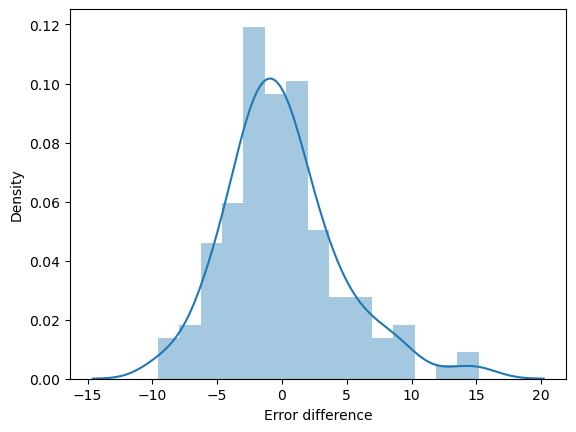

In [22]:
import seaborn as sns
sns.distplot(y_test-y_pred_lasso)
plt.xlabel('Error difference')
plt.show()

In [ ]:
sns.distplot(y_test-y_pred_ridge)
plt.show()

In [28]:
predicted_value=pd.DataFrame(y_pred_lasso,columns=['predicted_value'])

In [39]:
Actual_val=pd.DataFrame(y_test)

In [40]:
predicted_value

,predicted_value
0,13.693355
1,39.636547
2,13.747748
3,20.142343
4,29.893060
...,...
127,22.962730
128,24.031471
129,12.471115
130,27.305870


In [45]:
Actual_val=Actual_val.reset_index().drop('index',axis=1)

In [48]:
predicted_value+Actual_val

,Price,predicted_value
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
127,NaN,NaN
128,NaN,NaN
129,NaN,NaN
130,NaN,NaN


In [52]:
res=pd.concat([Actual_val,predicted_value],join='outer',axis=1)

In [54]:
res['residual']=res['Price']-res['predicted_value']

In [55]:
res

,Price,predicted_value,residual
0,20.0,13.693355,6.306645
1,45.4,39.636547,5.763453
2,13.1,13.747748,-0.647748
3,21.7,20.142343,1.557657
4,25.0,29.893060,-4.893060
...,...,...,...
127,19.4,22.962730,-3.562730
128,23.8,24.031471,-0.231471
129,18.5,12.471115,6.028885
130,22.1,27.305870,-5.205870


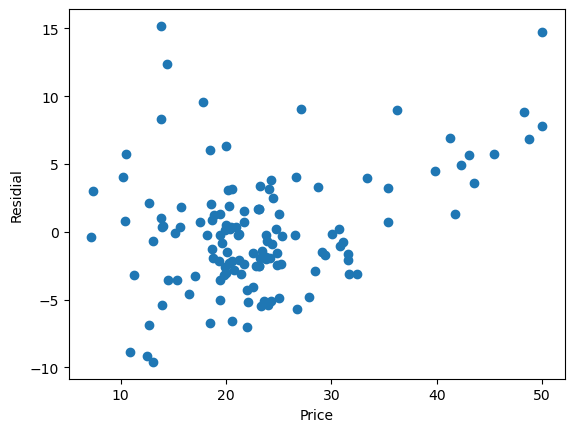

In [64]:
#### plot to check weather the error is following a definate pattern or not
plt.scatter(res['Price'],res['residual'])
plt.xlabel('Price')
plt.ylabel('Residial')
plt.show()